Apple's DepthPro
====

**Depth Pro: Sharp Monocular Metric Depth in Less Than a Second**
 * Paper: https://arxiv.org/abs/2410.02073

![DepthPro Overview](../assets/depthpro_overview.png)

```bash
git clone https://github.com/apple/ml-depth-pro.git
cd ml-depth-pro/
pip install -e .
# download pre-trained model
source get_pretrained_models.sh
```

In [1]:
from PIL import Image
import torch
import depth_pro
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model and preprocessing transform
model, transform = depth_pro.create_model_and_transforms()
model.eval().to(device);

In [2]:
image_path = "../samples/plants.jpg"
# Load and preprocess an image.
image, _, f_px = depth_pro.load_rgb(image_path)
print("image shape:", image.shape, f_px)

image_transformed = transform(image)
print("image_transformed shape:", image_transformed.shape)

# Run inference.
prediction = model.infer(image_transformed.to(device), f_px=f_px)

depth = prediction["depth"]  # Depth in [m].
print("depth shape:", depth.shape)

# Focal length in pixels.
focallength_px = prediction["focallength_px"]

image shape: (1137, 1068, 3) None
image_transformed shape: torch.Size([3, 1137, 1068])
depth shape: torch.Size([1137, 1068])


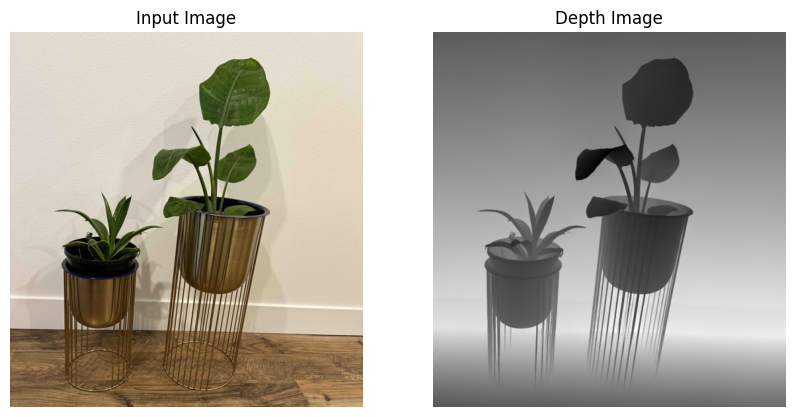

In [3]:

# resize for visualization
img = Image.fromarray(image)
img_resized = img.resize((img.width // 2, img.height // 2))

depth_arr = depth.detach().cpu().numpy()
depth_norm = (depth_arr - depth_arr.min())
depth_norm /= (depth_arr.max() - depth_arr.min())
depth_img = Image.fromarray(depth_norm * 255)
depth_img_resized = depth_img.resize(
    (img.width // 2, img.height // 2)
)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_resized)
axes[0].set_title("Input Image")
axes[0].axis("off")
axes[1].imshow(depth_img_resized, cmap="plasma")
axes[1].set_title("Depth Image")
axes[1].axis("off")
plt.show()